In [68]:
%matplotlib inline

import sys
sys.path.append("../.")

import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split

from tokenizer import Tokenizer
from vocab import Vocabulary
from global_attention.predict import Predictor
from global_attention.model import Seq2Seq
from data import NMTDataset

# Set random seed
torch.random.manual_seed(47)

# Set xaxis_labels on top of figure
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['figure.figsize'] = 10, 10

# NMT Evaluation

This notebook is to evaluate some of the pretrained Seq2Seq models.

## Data loading

In [45]:
dataset = NMTDataset("../dataset/fra.txt")

print(dataset)

NMTDataset(
  filepath=../dataset/fra.txt,
  src_lang=English,
  tar_lang=French,
  src_transform=None,
  tar_transform=None
)


During the training the dataset 10% was left out for testing.

In [46]:
test_split = 0.1

test_size = int(len(dataset) * test_split)
train_size = len(dataset) - test_size

train_subset, test_subset = random_split(dataset, lengths=[train_size, test_size])

## Prediction

Load the vocabulary

In [47]:
src_vocab = Vocabulary.from_file("../dataset/eng_vocab.txt")
tar_vocab = Vocabulary.from_file("../dataset/fra_vocab.txt")

Load the model

In [58]:
model = Seq2Seq.load("../global_attention/trained_models3/seq2seq_ep:3-loss:3.2896-score:0.1023.pt")

Initialize the predictor

In [59]:
predictor = Predictor(model, Tokenizer(end_token=src_vocab.end_token), src_vocab, tar_vocab)

Try some translation from **train** data

In [50]:
def translate(src_sentence, tar_sentence):
    t = predictor(src_sentence)
    print(f"> {src_sentence}")
    print(f"= {tar_sentence}")
    print(f"< {t}")
    
    return t

\> Sentence for translation  
= Correct translation  
< Predicted translation  

In [60]:
t = translate(*train_subset[2])

> These books are worth reading at least once.
= Ces ouvrages valent le coup d'être lus au moins une fois.
< il possède de lire de livres.


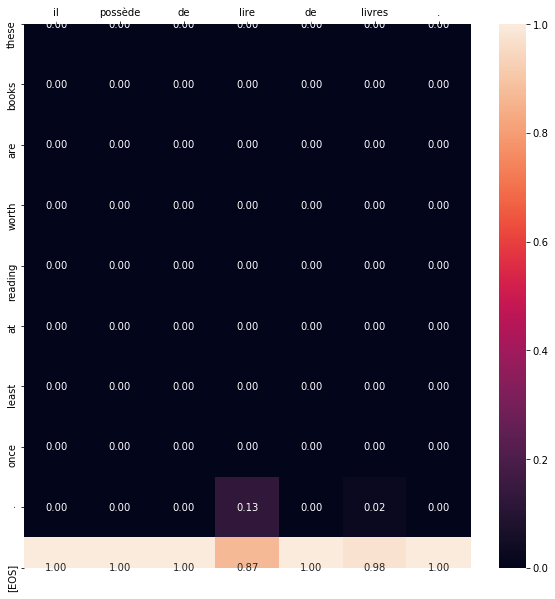

In [70]:
t.plot_attention()